<a href="https://colab.research.google.com/github/sungjindo/python_study/blob/main/ch8_%EB%8F%84%EC%84%B1%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**이름: 도성진**

## 1. seoul.csv 파일을 DataFrame으로 불러와서 각 변수들에 대해서 요약통계량을 구해보라.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 한글 출력 시 (Colab 용)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False 

import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

font_list[:]
# 윈도우는 아래 참고
# https://m.blog.naver.com/itisik/221789012960

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


['/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/

In [ ]:
print (mpl.matplotlib_fname())


/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
seoul = pd.read_csv('/content/drive/My Drive/data/data/seoul.csv', encoding='cp949')

In [ ]:
seoul.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,40843.0,40087.000000,40086.000000,40085.000000
mean,108.0,11.756452,7.464354,16.764014
std,0.0,10.655657,10.880051,10.980574
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.700000,-1.400000,7.200000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


In [ ]:

seoul

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1908-01-01,108,-5.9,-9.1,-1.3
1,1908-01-02,108,-7.7,-13.9,-3.0
2,1908-01-03,108,-6.2,-10.8,-2.9
3,1908-01-04,108,-7.5,-12.8,-1.7
4,1908-01-05,108,-4.8,-11.3,-0.1
...,...,...,...,...,...
40838,2020-12-27,108,5.8,1.4,10.0
40839,2020-12-28,108,6.7,4.2,11.4
40840,2020-12-29,108,0.1,-6.2,4.3
40841,2020-12-30,108,-10.9,-12.9,-6.2


## 2. ‘date’라는 datetime변수를 추가하고 ‘날짜’변수와 ‘지점’변수를 제거하라.

In [ ]:
seoul['date']= pd.to_datetime(seoul['날짜'], format="%Y-%m-%d", errors = 'ignore')
seoul = seoul.drop(columns=['날짜','지점'])

In [ ]:
seoul.dtypes

평균기온(℃)           float64
최저기온(℃)           float64
최고기온(℃)           float64
date       datetime64[ns]
dtype: object

In [ ]:

seoul.columns

Index(['평균기온(℃)', '최저기온(℃)', '최고기온(℃)', 'date'], dtype='object')

## 3.  ‘date’로부터 년도, 월, 요일에 해당하는 정보를 추출하여 ‘year’, ‘month’, ‘week’변수를 추가하라.

In [ ]:

seoul['year'] = dataframe['date'].dt.year
seoul['month'] = dataframe['date'].dt.month
seoul['week'] = dataframe['date'].dt.day_name()

In [ ]:
seoul

,평균기온(℃),최저기온(℃),최고기온(℃),date,year,month,week
0,-5.9,-9.1,-1.3,1908-01-01,1908,1,Wednesday
1,-7.7,-13.9,-3.0,1908-01-02,1908,1,Thursday
2,-6.2,-10.8,-2.9,1908-01-03,1908,1,Friday
3,-7.5,-12.8,-1.7,1908-01-04,1908,1,Saturday
4,-4.8,-11.3,-0.1,1908-01-05,1908,1,Sunday
...,...,...,...,...,...,...,...
40838,5.8,1.4,10.0,2020-12-27,2020,12,Sunday
40839,6.7,4.2,11.4,2020-12-28,2020,12,Monday
40840,0.1,-6.2,4.3,2020-12-29,2020,12,Tuesday
40841,-10.9,-12.9,-6.2,2020-12-30,2020,12,Wednesday


## 4. ‘date’를 line index로 설정하라. 

In [ ]:
seoul.index = seoul['date']

In [ ]:
seoul.head(5)

,평균기온(℃),최저기온(℃),최고기온(℃),date,year,month,week
date,,,,,,,
1908-01-01,-5.9,-9.1,-1.3,1908-01-01,1908,1,Wednesday
1908-01-02,-7.7,-13.9,-3.0,1908-01-02,1908,1,Thursday
1908-01-03,-6.2,-10.8,-2.9,1908-01-03,1908,1,Friday
1908-01-04,-7.5,-12.8,-1.7,1908-01-04,1908,1,Saturday
1908-01-05,-4.8,-11.3,-0.1,1908-01-05,1908,1,Sunday


## 5. 1980년부터 2020년 사이의 ‘평균기온(℃)’의 연도별 최댓값을 선그래프로 작성하라. 

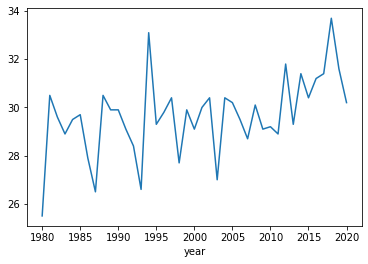

In [ ]:
seoul.loc['1980-01-01':'2020-12-31'].groupby('year')['평균기온(℃)'].max().plot()

## 6. 전체기간에 대해 ‘최고기온(℃)’에 대한 히스토그램과 월별, 요일별 상자그림을 작성하라.

최고기온(℃)


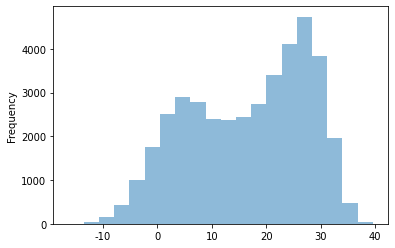

In [ ]:
print('최고기온(℃)')
seoul['최고기온(℃)'].plot.hist(alpha =0.5, bins = 20)


월별 상자그림


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_te

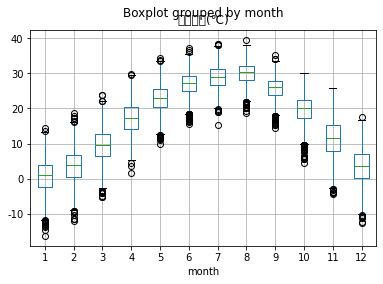

In [ ]:
print('월별 상자그림')
seoul.boxplot(column = '최고기온(℃)' , by = 'month')

요일별 상자그림


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_te

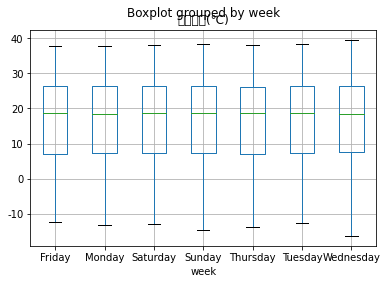

In [ ]:
print('요일별 상자그림')
seoul.boxplot(column = '최고기온(℃)', by = 'week')

월별 상자그림


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac9c320f50>,
      dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_te

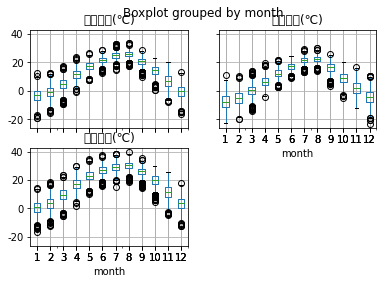

In [ ]:
print('월별 상자그림')
seoul.boxplot(column = ['평균기온(℃)',	'최저기온(℃)',	'최고기온(℃)'], by = 'month')